In [79]:
import os
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
caminho = os.path.join('..', 'dados', 'Data Sets- STATA')

## C1

In [13]:
filename = os.path.join(caminho, '401K.DTA')
df = pd.read_stata(filename, preserve_dtypes=False)
df.head()

,prate,mrate,totpart,totelg,age,totemp,sole,ltotemp
0,26.100000,0.21,1653.0,6322.0,8,8709.0,0,9.072112
1,100.000000,1.42,262.0,262.0,6,315.0,1,5.752573
2,97.599998,0.91,166.0,170.0,10,275.0,1,5.616771
3,100.000000,0.42,257.0,257.0,7,500.0,0,6.214608
4,82.500000,0.53,591.0,716.0,28,933.0,1,6.838405


In [14]:
df.describe()

,prate,mrate,totpart,totelg,age,totemp,sole,ltotemp
count,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000
mean,87.362907,0.731512,1354.230769,1628.534550,13.181226,3568.495437,0.487614,6.686034
std,16.716537,0.779539,4629.264665,5370.719356,9.171114,11217.939519,0.500010,1.453375
min,3.000000,0.010000,50.000000,51.000000,4.000000,58.000000,0.000000,4.060443
25%,78.025000,0.300000,156.250000,176.000000,7.000000,261.000000,0.000000,5.564520
50%,95.699997,0.460000,276.000000,330.000000,9.000000,588.000000,0.000000,6.376725
75%,100.000000,0.830000,749.500000,890.500000,18.000000,1804.000000,1.000000,7.497761
max,100.000000,4.910000,58811.000000,70429.000000,51.000000,144387.000000,1.000000,11.880253


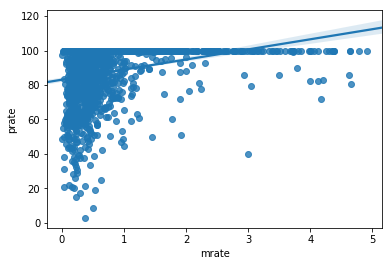

In [25]:
%matplotlib inline
import seaborn as sns
sns.regplot(x='mrate', y='prate', data=df)

In [26]:
model = smf.ols(formula='prate ~ mrate', data=df)
results = model.fit()

In [27]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  prate   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     123.7
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           1.10e-27
Time:                        13:30:39   Log-Likelihood:                -6437.0
No. Observations:                1534   AIC:                         1.288e+04
Df Residuals:                    1532   BIC:                         1.289e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     83.0755      0.563    147.484      0.0

In [28]:
# item iii
results.params

Intercept    83.075455
mrate         5.861079
dtype: float64

In [35]:
# item iv
results.predict(exog=dict(mrate=[3.5]))

0    103.589233
dtype: float64

In [38]:
# item v - 5,8%
v = results.params['mrate'] / 100
v

0.058610791896674064

## C8

xi mean 4.97 xi std 2.82


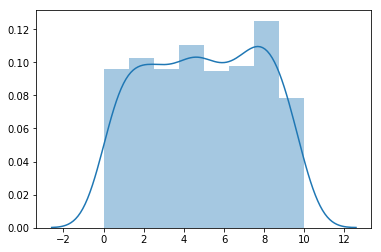

In [186]:
import numpy as np
# i 
xi = np.random.uniform(0, 10, 500)
print('xi mean %.2f xi std %.2f' % (xi.mean(), xi.std()))
sns.distplot(xi)

ui mean -0.26 ui std 6.12


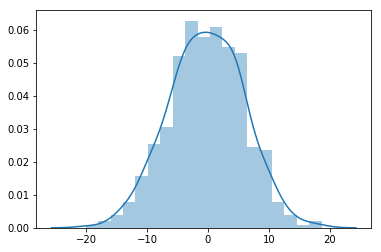

In [187]:
#ii
ui = np.random.normal(0, 6, 500)
print('ui mean %.2f ui std %.2f' % (ui.mean(), ui.std()))
sns.distplot(ui)

yi mean 10.67 yi std 8.59


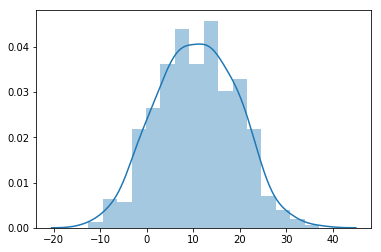

In [188]:
#iii
yi = np.array([1 + 2*x + u for x, u in zip(xi, ui)])
print('yi mean %.2f yi std %.2f' % (yi.mean(), yi.std()))
sns.distplot(yi)

In [189]:
X = sm.add_constant(xi)
model = smf.OLS(yi, X)
results = model.fit()
p = results.params
print(p)
y_hat = results.predict(X)

[0.05958443 2.13667639]


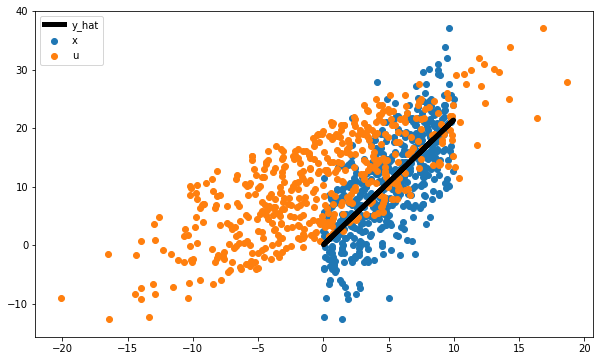

In [190]:
import matplotlib.pyplot as plt
x = np.arange(-18, 18)
plt.figure(figsize=(10, 6))
plt.scatter(x=xi, y=yi, label='x')
plt.scatter(x=ui, y=yi, label='u')
plt.plot(xi, y_hat, label='y_hat', color='black', linewidth=5.0)
l = plt.legend()


In [191]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     486.0
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           1.14e-75
Time:                        18:43:15   Log-Likelihood:                -1614.2
No. Observations:                 500   AIC:                             3232.
Df Residuals:                     498   BIC:                             3241.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0596      0.554      0.108      0.9

res mean 0.00 res std 6.11


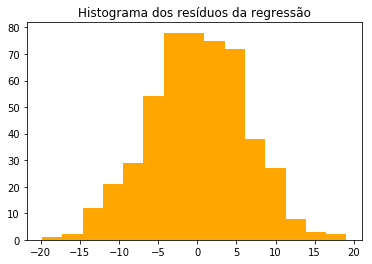

In [192]:
# iv
res = yi - y_hat
print('res mean %.2f res std %.2f' % (res.mean(), res.std()))
plt.hist(res, color='orange', bins=15)
plt.title('Histograma dos resíduos da regressão')
plt.show()


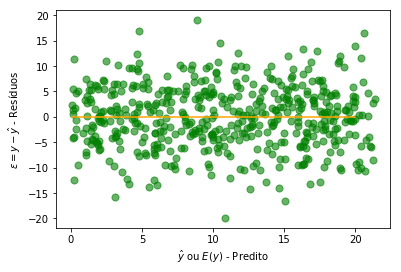

In [193]:
plt.scatter(y=res, x=y_hat, color='green', s=50, alpha=.6)
plt.hlines(y=0, xmin=0, xmax=20, color='orange')
plt.ylabel('$\epsilon = y - \hat{y}$ - Resíduos')
plt.xlabel('$\hat{y}$ ou $E(y)$ - Predito')
plt.show()

## C9

In [195]:
filename = os.path.join(caminho, 'countymurders.dta')
county_murders = pd.read_stata(filename, preserve_dtypes=False)
county_murders.head()

,arrests,countyid,density,popul,perc1019,perc2029,percblack,percmale,rpcincmaint,rpcpersinc,rpcunemins,year,murders,murdrate,arrestrate,statefips,countyfips,execs,lpopul,execrate
0,2.0,1001,54.049999,32216.0,20.629999,15.28,22.330000,40.250000,167.669998,8780.799805,29.160000,1980,2,0.620810,0.620809,1,1,0,10.380219,0.0
1,3.0,1001,53.660000,31984.0,20.190001,15.55,22.070000,40.360001,167.990005,8232.799805,43.919998,1981,1,0.312656,0.937969,1,1,0,10.372991,0.0
2,2.0,1001,53.750000,32036.0,19.660000,15.73,21.799999,40.419998,166.630005,8327.610352,71.410004,1982,3,0.936446,0.624298,1,1,0,10.374616,0.0
3,7.0,1001,53.779999,32056.0,19.100000,15.88,21.530001,40.470001,176.529999,8545.549805,72.220001,1983,7,2.183679,2.183679,1,1,0,10.375239,0.0
4,3.0,1001,53.910000,32128.0,18.539999,15.92,21.260000,40.509998,166.250000,8965.160156,40.360001,1984,2,0.622510,0.933765,1,1,0,10.377483,0.0


In [228]:
# i
county_murders['murders'].describe()

count    37349.000000
mean         7.286915
std         47.217586
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max       1944.000000
Name: murders, dtype: float64

In [241]:
cm1996 = county_murders[county_murders['year'] == 1996]
county_zero = cm1996[cm1996['murders'] == 0].groupby('countyid')
county_nozero = cm1996[cm1996['murders'] > 0].groupby('countyid')
print('%d condados com zero assassinatos\n' % len(county_zero) +
      '%d condados com mais de um assassinato\n' % len(county_nozero) +
      '%d maior numero de assassinatos' % cm1996['murders'].max()
     )

1051 condados com zero assassinatos
1146 condados com mais de um assassinato
1403 maior numero de assassinatos


In [243]:
murder_model = smf.ols(formula='murders ~ execs', data=cm1996)
murder_reg = murder_model.fit()
print(murder_reg.summary())
y_hat_murder = murder_reg.predict()

                            OLS Regression Results                            
Dep. Variable:                murders   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     100.8
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           3.25e-23
Time:                        19:17:40   Log-Likelihood:                -11159.
No. Observations:                2197   AIC:                         2.232e+04
Df Residuals:                    2195   BIC:                         2.233e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4572      0.835      6.537      0.0

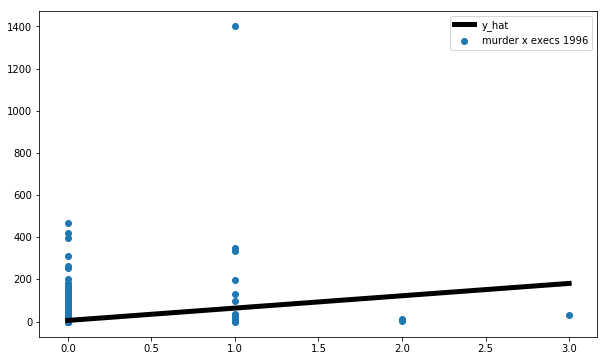

In [274]:
x = np.arange(0, cm1996['execs'].max() + 1)
y_hat_ = murder_reg.predict(exog={'execs':x})
plt.figure(figsize=(10, 6))
plt.plot(x, y_hat_, label='y_hat', color='black', linewidth=5.0)
plt.scatter(x=cm1996['execs'], y=cm1996['murders'], label='murder x execs 1996')
l = plt.legend()

In [275]:
# iv
print('iv - O resultado é igual ao intercepto %.2f' % murder_reg.params[0])

iv - O resultado é igual ao intercepto 5.46
